<a href="https://www.kaggle.com/code/eduardolicea/healthcare-dataset-visual-eda?scriptVersionId=235018620" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

1. [Healthcare Dataset Overview](#healthcare-dataset-overview)
2. [Objective](#objective)
3. [Data Inspection](#inspection)
4. [Data Cleaning](#data-cleaning)
5. [Healthcare Exploratory Data Analysis (EDA)](#eda)
   1. [Visualizations](#visualization)
   2. [Financial Insights & Billing](#financial-insights-trends)
   3. [Patient Demographics & Admissions](#patient-demographics-admissions)
   4. [Hospital Operations & Patient Flow](#hospital-operations-patient-flow)

<img src="https://images.pexels.com/photos/40568/medical-appointment-doctor-healthcare-40568.jpeg?auto=compress&cs=tinysrgb" style="max-width: 1920px; max-height: 1080px; width: 100%; height: auto;" />

<a id="healthcare-dataset-overview"></a>
<h1>Healthcare Dataset Overview</h1>

Name: Patient name

Age: Patient age (integer)

Gender: Male/Female

Blood Type: Blood group (e.g., A+, O-)

Medical Condition: Primary diagnosed condition

Date of Admission and Discharge Date: Hospitalization timeline

Doctor: Primary attending doctor

Hospital: Name of healthcare facility

Insurance Provider: Patient's insurance company

Billing Amount: Total charges for stay (float)

Room Number: Assigned hospital room

Admission Type: Emergency or Elective

Medication: Prescribed drug(s)

Test Results: Outcome of medical tests (Normal, Abnormal, Inconclusive)

Length of Stay: Total hospitalization days (integer)

<a id="objective"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Objective</h1>
</div>

<div class="alert alert-block ">
    <pre style="background-color: black; color: white; padding: 10px; border-radius: 5px; white-space: pre-wrap; word-wrap: break-word;">
        
"The goal of this exploratory data analysis is to uncover key trends and patterns in hospital admissions, patient demographics, medical conditions, and financial aspects of healthcare utilization. By analyzing patient visits, billing amounts, and common medical conditions, I aim to provide insights into patient demographics, financials, and patient care."
    </pre>
</div>

<a id="import-loading"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Import Libraries & Data Loading</h1>
</div>

In [1]:
pip install --upgrade pandas seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno
import numpy as np
import seaborn as sns

pd.option_context('mode.use_inf_as_na', True)
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("/kaggle/input/healthcare-dataset/modified_healthcare_dataset.csv")

<a id="inspection"></a>
<div style="
    border-left: 6px solid #0dcaf0;
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Data Inspection</h1>
</div>

In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay'],
      dtype='object')

In [5]:
df.shape

(55500, 16)

In [6]:
df.size

888000

In [7]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,328,Emergency,2024-02-07,Azithromycin,Normal,7
1,Leslie Terry,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,265,Emergency,2019-08-22,Tamiflu,Abnormal,2
2,Danny Smith,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214065,205,Elective,2022-10-30,Cisplatin,Inconclusive,38
3,Andrew Watts,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,450,Elective,2020-11-19,Prednisone,Normal,1
4,Adrienne Bell,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660254,458,Routine,2022-10-27,Beta-blockers,Inconclusive,38


In [8]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
55495,Elizabeth Jackson,62,Male,AB-,Cancer,2020-08-16,Joshua Jarvis,Northwestern Memorial Hospital,Cigna,59679.584305,417,Urgent,2020-09-26,Doxorubicin,Abnormal,41
55496,Kyle Perez,63,Male,A+,Heart Disease,2020-01-23,Taylor Sullivan,UI Health (University of Illinois Hospital),Medicare,26828.223456,316,Emergency,2020-03-07,Statins,Abnormal,44
55497,Heather Wang,28,Female,O+,Asthma,2020-07-13,Joe Jacobs DVM,Northwestern Memorial Hospital,Cigna,6041.030866,347,Elective,2020-07-16,Montelukast,Normal,3
55498,Jennifer Jones,75,Male,O+,Cancer,2019-05-25,Kimberly Curry,UChicago Medicine,Aetna,44495.656362,321,Emergency,2019-07-11,Methotrexate,Abnormal,47
55499,James Garcia,53,Female,O+,Diabetes,2024-04-02,Dennis Warren,Loyola University Medical Center,Cigna,15953.455966,448,Emergency,2024-04-12,Insulin,Abnormal,10


In [9]:
df.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
2413,David Hernandez,59,Male,B+,Heart Disease,2022-09-17,Denise Gardner,UI Health (University of Illinois Hospital),UnitedHealthcare,34191.804355,196,Emergency,2022-10-02,Beta-blockers,Inconclusive,15
51504,Melissa Dean,70,Male,A+,Diabetes,2019-09-24,Douglas Lewis MD,Loyola University Medical Center,Blue Cross,15719.010564,234,Elective,2019-10-01,Insulin,Abnormal,7
43589,Daniel Stein,56,Female,A+,Obesity,2022-04-14,Luis Bates,UI Health (University of Illinois Hospital),Cigna,13080.215537,142,Routine,2022-04-21,Metformin,Abnormal,7
43509,Karen Cole,58,Male,B+,Obesity,2022-10-08,Richard Boyle,UI Health (University of Illinois Hospital),UnitedHealthcare,13376.430707,232,Emergency,2022-10-13,Phentermine,Normal,5
10331,Jose Thomas,76,Female,O+,Heart Disease,2020-09-07,Scott Leonard,Northwestern Memorial Hospital,Blue Cross,32534.478239,108,Urgent,2020-09-17,Statins,Abnormal,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
 15  Length of Stay      55500 non-null  int64  
dtypes: f

In [11]:
df.nunique

<bound method DataFrame.nunique of                     Name  Age  Gender Blood Type Medical Condition  \
0          Bobby Jackson   19  Female        AB+        Infections   
1           Leslie Terry   15  Female         B-               Flu   
2            Danny Smith   50  Female         A+            Cancer   
3           Andrew Watts   24  Female         O+            Asthma   
4          Adrienne Bell   80  Female         A+     Heart Disease   
...                  ...  ...     ...        ...               ...   
55495  Elizabeth Jackson   62    Male        AB-            Cancer   
55496         Kyle Perez   63    Male         A+     Heart Disease   
55497       Heather Wang   28  Female         O+            Asthma   
55498     Jennifer Jones   75    Male         O+            Cancer   
55499       James Garcia   53  Female         O+          Diabetes   

      Date of Admission            Doctor  \
0            2024-01-31     Matthew Smith   
1            2019-08-20   Samantha

In [12]:
df.duplicated().sum()

0

In [13]:
for col in df.select_dtypes(include=['object']).columns:
    has_whitespace = df[col].str.match(r'^\s|\s$').any()
    print(f"Column '{col}' has leading/trailing whitespace: {has_whitespace}")

Column 'Name' has leading/trailing whitespace: False
Column 'Gender' has leading/trailing whitespace: False
Column 'Blood Type' has leading/trailing whitespace: False
Column 'Medical Condition' has leading/trailing whitespace: False
Column 'Date of Admission' has leading/trailing whitespace: False
Column 'Doctor' has leading/trailing whitespace: False
Column 'Hospital' has leading/trailing whitespace: False
Column 'Insurance Provider' has leading/trailing whitespace: False
Column 'Admission Type' has leading/trailing whitespace: False
Column 'Discharge Date' has leading/trailing whitespace: False
Column 'Medication' has leading/trailing whitespace: False
Column 'Test Results' has leading/trailing whitespace: False


In [14]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
Length of Stay        0
dtype: int64

<Axes: >

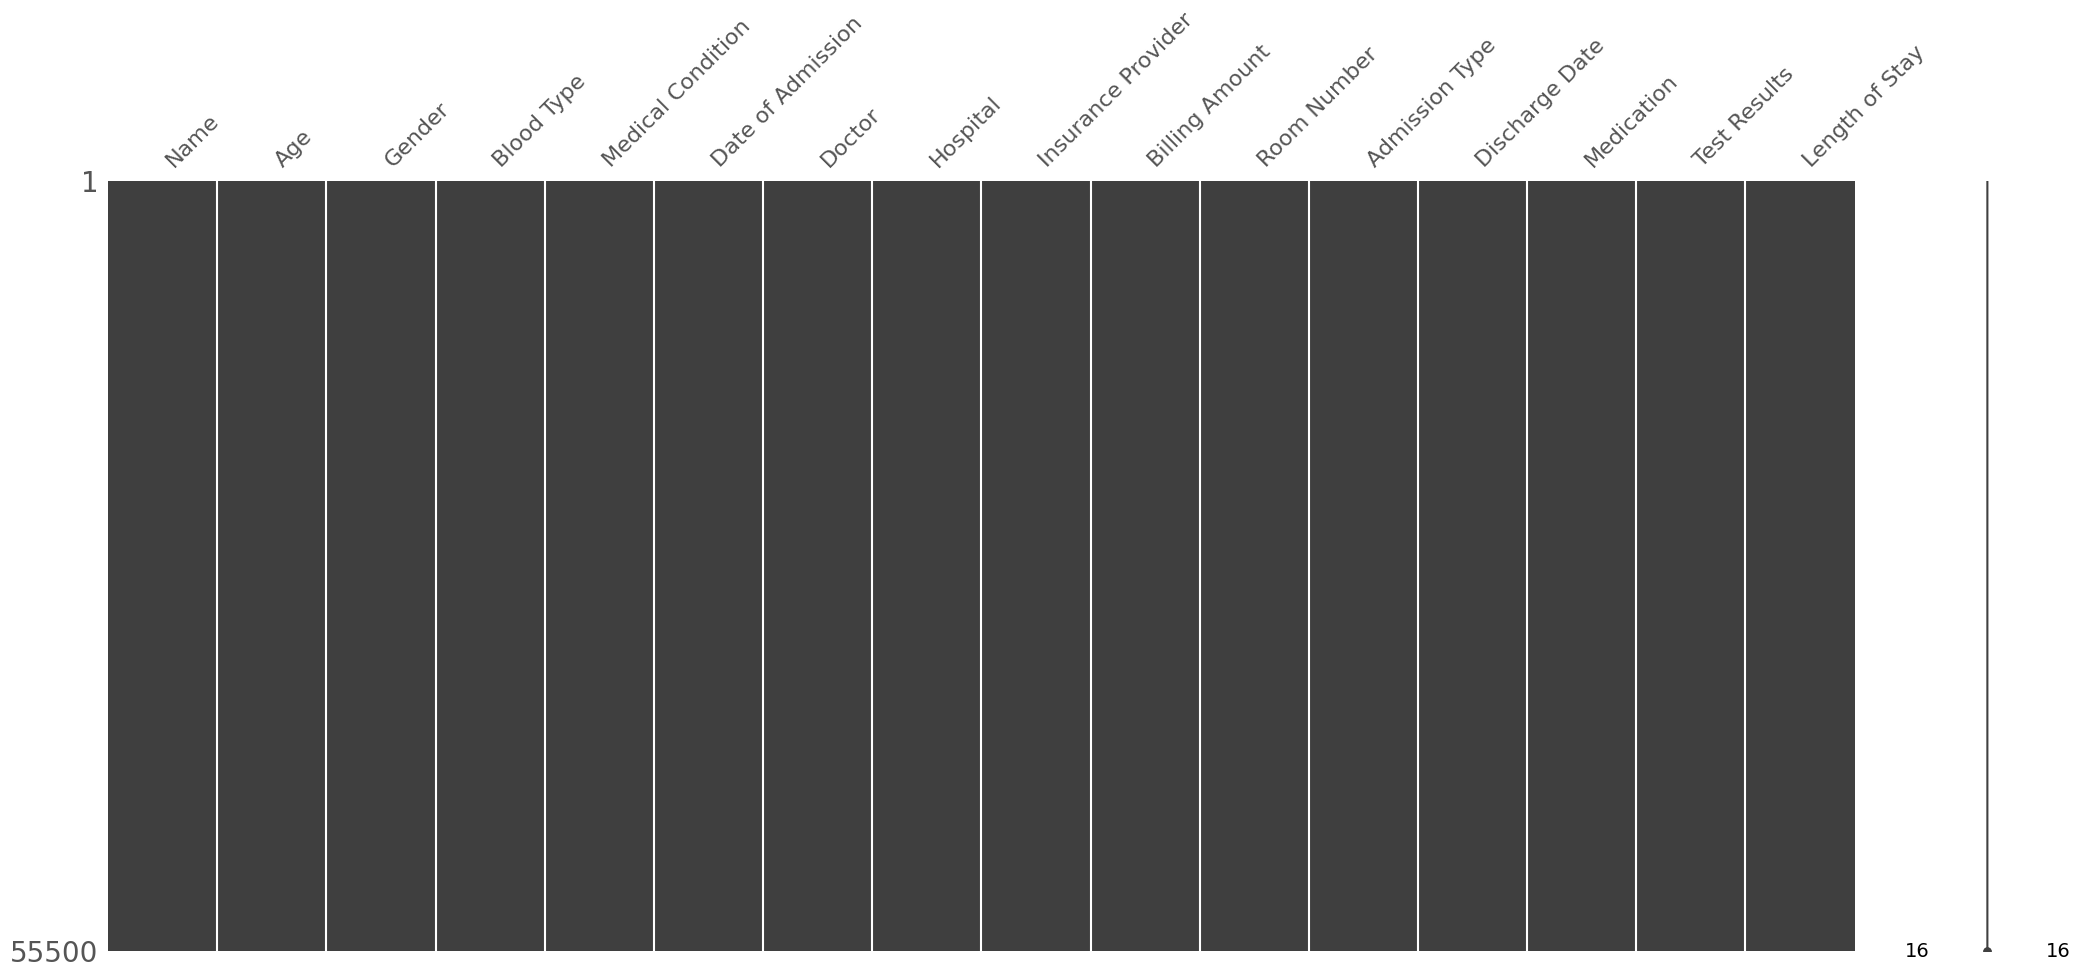

In [15]:
msno.matrix(df)

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #0dcaf0;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="list-style-type: none; padding: 0; margin: 0;">
    <li style="margin-top: 8px;"><strong>Shape:</strong> 55,500 rows × 16 columns</li>
    <li style="margin-top: 8px;"><strong>Size:</strong> 888,000 total data points</li>
    <li style="margin-top: 8px;"><strong>Column Types:</strong> 1 float, 3 integer, and 12 object columns</li>
    <li style="margin-top: 8px;"><strong>Duplicate Rows:</strong> None detected</li>
    <li style="margin-top: 8px;"><strong>Leading/Trailing Whitespace:</strong> None found in string fields</li>
    <li style="margin-top: 8px;">
      <strong>Missing Values Summary:</strong> The dataset contains the following number of missing (Null/NaN) entries per column:
      <ul style="margin-top: 8px;">
<li><strong>None</strong></li>
      </ul>
    </li>
  </ul>
</div>


<a id="data-cleaning"></a>
<div style="
    border-left: 6px solid white;
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Data Cleaning</h1>
</div>

In [16]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['name', 'age', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance_provider',
       'billing_amount', 'room_number', 'admission_type', 'discharge_date',
       'medication', 'test_results', 'length_of_stay'],
      dtype='object')

In [17]:
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])

print(df['date_of_admission'].dtypes, df['discharge_date'].dtypes)

datetime64[ns] datetime64[ns]


<a id="2022-sales-analysis"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    border-left: 6px solid #4CAF50;
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Healthcare Exploratory Data Analysis (EDA)</h1>
    Goal: To systematically explore the dataset to uncover meaningful patterns and emerging trends within the healthcare domain.
</div>

In [18]:
df.describe()

,age,date_of_admission,billing_amount,room_number,discharge_date,length_of_stay
count,55500.000000,55500,55500.000000,55500.000000,55500,55500.000000
mean,48.001622,2021-11-01 01:02:22.443243008,21835.044635,301.134829,2021-11-18 21:13:25.621621504,17.841009
min,5.000000,2019-05-08 00:00:00,500.220989,101.000000,2019-05-09 00:00:00,1.000000
25%,32.000000,2020-07-28 00:00:00,4195.525741,202.000000,2020-08-14 00:00:00,4.000000
50%,50.000000,2021-11-01 00:00:00,11089.537763,302.000000,2021-11-18 00:00:00,8.000000
75%,65.000000,2023-02-03 00:00:00,35887.703406,401.000000,2023-02-20 00:00:00,28.000000
max,90.000000,2024-05-07 00:00:00,99997.797977,500.000000,2024-07-28 00:00:00,89.000000
std,21.105827,NaN,23574.413594,115.243069,NaN,20.272294


<h3 style="margin-bottom: 10px; font-weight: bold;">Insights</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #4CAF50;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      The dataset contains <strong>55,500 entries</strong> across key numerical fields: <code>Age</code>, <code>Billing Amount</code>, <code>Room Number</code>, and <code>Length of Stay</code>.
    </li>
    <li style="margin-top: 8px;">
      The <strong>average patient age</strong> is approximately <strong>48 years</strong>, with ages ranging from <strong>5 to 90 years</strong>.
    </li>
    <li style="margin-top: 8px;">
      The <strong>mean billing amount</strong> is around <strong>\$21,835</strong>, but varies significantly, reaching up to nearly <strong>$100,000</strong> for some patients.
    </li>
    <li style="margin-top: 8px;">
      The <strong>median length of stay</strong> is <strong>8 days</strong>, while the maximum length of stay recorded is <strong>89 days</strong>, indicating a wide range of patient conditions and severities.
    </li>
    <li style="margin-top: 8px;">
      Patients are typically assigned to room numbers ranging from <strong>101 to 500</strong>, with a mean room number around <strong>301</strong>.
    </li>
    <li style="margin-top: 8px;">
      The <strong>standard deviation of billing amounts</strong> is quite high (<strong>\$23,574</strong>), suggesting significant variability in healthcare costs depending on patient condition, treatment, and length of stay.
    </li>
  </ul>
</div>


In [19]:
df.describe(include= "object").T

,count,unique,top,freq
name,55500,40235,Michael Williams,24
gender,55500,2,Female,27955
blood_type,55500,8,O+,15696
medical_condition,55500,8,Flu,7046
doctor,55500,40341,Michael Smith,27
hospital,55500,4,Northwestern Memorial Hospital,14070
insurance_provider,55500,5,Cigna,11183
admission_type,55500,4,Emergency,20104
medication,55500,23,Metformin,4653
test_results,55500,3,Abnormal,27784


<h3 style="margin-bottom: 10px; font-weight: bold;">Insights</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #4CAF50;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      The dataset contains <strong>55,500 entries</strong> across all categorical fields, with no missing values detected.
    </li>
    <li style="margin-top: 8px;">
      <strong>Gender</strong> distribution is nearly even, with <strong>Female</strong> patients slightly outnumbering males (<strong>27,955 females</strong>).
    </li>
    <li style="margin-top: 8px;">
      The most common <strong>Blood Type</strong> is <strong>O+</strong>, representing about <strong>28%</strong> of patients.
    </li>
    <li style="margin-top: 8px;">
      The most frequently diagnosed <strong>Medical Condition</strong> is <strong>Flu</strong>, affecting <strong>7,046 patients</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Northwestern Memorial Hospital</strong> accounts for the largest share of admissions, with <strong>14,070 entries</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Cigna</strong> is the leading <strong>Insurance Provider</strong> for patients, covering <strong>11,183 entries</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Emergency admissions</strong> dominate the dataset, comprising over <strong>20,000 cases</strong>.
    </li>
    <li style="margin-top: 8px;">
      The most prescribed <strong>Medication</strong> is <strong>Metformin</strong>, commonly used to treat diabetes, prescribed <strong>4,653 times</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Test Results</strong> show that nearly half of the patients had <strong>Abnormal</strong> results, indicating a high prevalence of significant medical findings.
    </li>
  </ul>
</div>


In [20]:
df['gender'].value_counts()

gender
Female    27955
Male      27545
Name: count, dtype: int64

In [21]:
df['blood_type'].value_counts()

blood_type
O+     15696
A+     15573
B+      5457
AB-     4485
B-      4408
O-      3341
A-      3301
AB+     3239
Name: count, dtype: int64

In [22]:
df['medical_condition'].value_counts()

medical_condition
Flu              7046
Diabetes         7005
Obesity          6994
Cancer           6940
Asthma           6908
Heart Disease    6900
Alzheimer’s      6861
Infections       6846
Name: count, dtype: int64

In [23]:
df['insurance_provider'].value_counts()

insurance_provider
Cigna               11183
UnitedHealthcare    11142
Blue Cross          11134
Medicare            11038
Aetna               11003
Name: count, dtype: int64

In [24]:
df['admission_type'].value_counts()

admission_type
Emergency    20104
Elective     13280
Urgent       11816
Routine      10300
Name: count, dtype: int64

In [25]:
df['medication'].value_counts()

medication
Metformin        4653
Zanamivir        2391
Methotrexate     2375
Glipizide        2362
Orlistat         2351
Insulin          2340
Aspirin          2337
Prednisone       2333
Oseltamivir      2329
Tamiflu          2326
Montelukast      2313
Azithromycin     2312
Memantine        2312
Amoxicillin      2311
Beta-blockers    2297
Doxorubicin      2296
Phentermine      2293
Donepezil        2292
Cisplatin        2269
Statins          2266
Albuterol        2262
Rivastigmine     2257
Ciprofloxacin    2223
Name: count, dtype: int64

In [26]:
df['test_results'].value_counts()

test_results
Abnormal        27784
Normal          17453
Inconclusive    10263
Name: count, dtype: int64

<h3 style="margin-bottom: 10px; font-weight: bold;">Observations</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #4CAF50;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Gender Distribution:</strong> The dataset is evenly split between genders, with <strong>27,955 females</strong> and <strong>27,545 males</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Blood Type Distribution:</strong> The most common blood types are <strong>O+</strong> (15,696 entries) and <strong>A+</strong> (15,573 entries).
    </li>
    <li style="margin-top: 8px;">
      <strong>Medical Conditions:</strong> The most prevalent conditions include <strong>Flu</strong> (7,046 cases), <strong>Diabetes</strong> (7,005 cases), and <strong>Obesity</strong> (6,994 cases).
    </li>
    <li style="margin-top: 8px;">
      <strong>Insurance Providers:</strong> The leading providers are <strong>Cigna</strong> (11,183 entries), <strong>UnitedHealthcare</strong> (11,142 entries), and <strong>Blue Cross</strong> (11,134 entries).
    </li>
    <li style="margin-top: 8px;">
      <strong>Admission Types:</strong> <strong>Emergency admissions</strong> dominate with <strong>20,104 entries</strong>, followed by <strong>Elective</strong> (13,280 entries) and <strong>Urgent</strong> (11,816 entries).
    </li>
    <li style="margin-top: 8px;">
      <strong>Medications:</strong> <strong>Metformin</strong> is the most prescribed medication, appearing in <strong>4,653 entries</strong>, followed by <strong>Zanamivir</strong> and <strong>Methotrexate</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Test Results:</strong> A majority of test outcomes are <strong>Abnormal</strong> (27,784 entries), followed by <strong>Normal</strong> (17,453 entries) and <strong>Inconclusive</strong> (10,263 entries).
    </li>
  </ul>
</div>


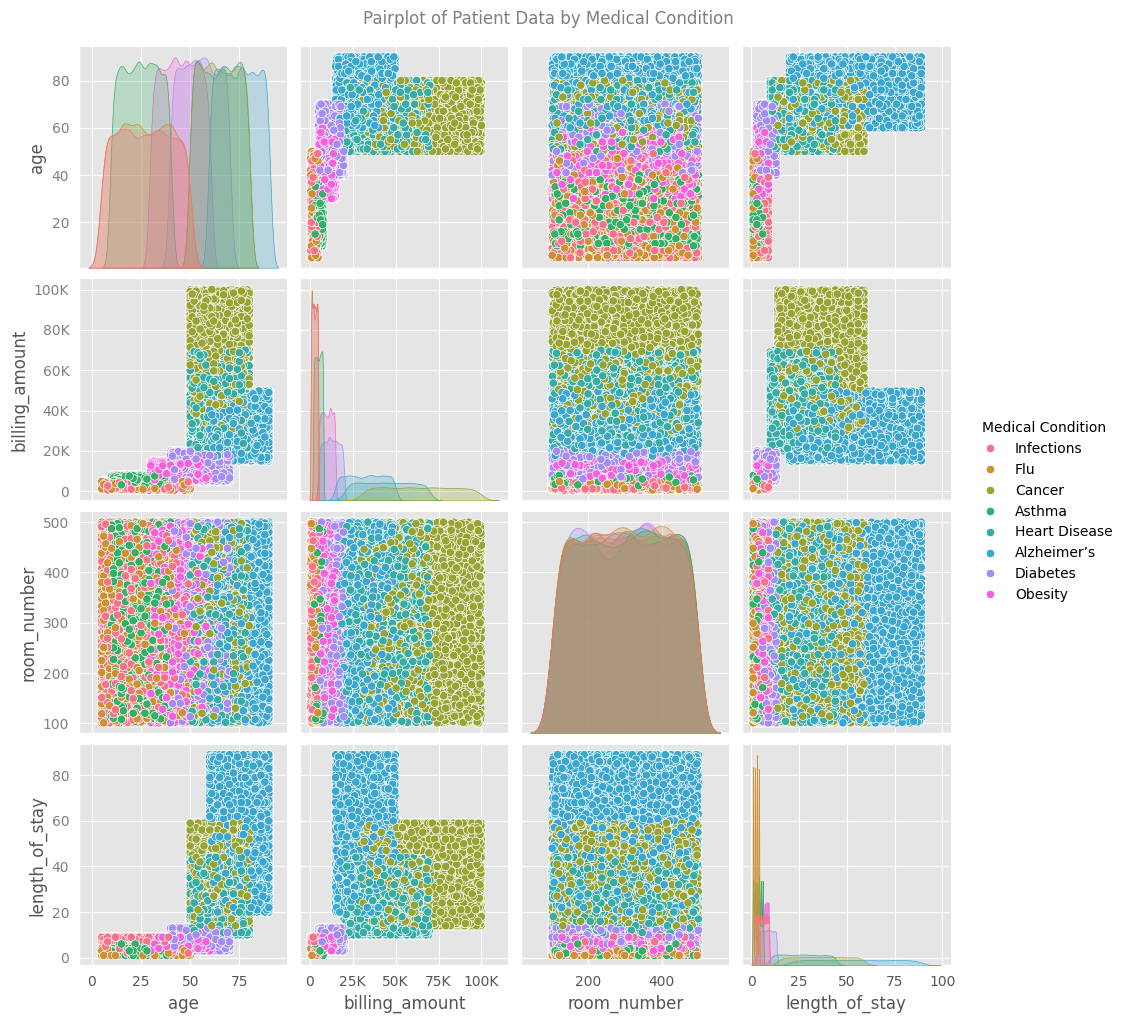

In [27]:
pair = sns.pairplot(df, hue="medical_condition")

for ax in pair.axes.flatten():
    ax.tick_params(axis='y', labelcolor='grey')
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K' if x >= 1000 else f'{int(x)}'))
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, pos: f'{y/1000:.0f}K' if y >= 1000 else f'{int(y)}'))
    ax.tick_params(axis='x', bottom=False)
    ax.tick_params(axis='y', left=False)
    
pair._legend.set_title("Medical Condition")
pair.fig.suptitle("Pairplot of Patient Data by Medical Condition", fontweight="ultralight", color="grey", y=1.02)

plt.show()

The pairplot reveals clear age-based clustering across medical conditions. Younger patients (under 30) are more likely to be admitted for acute issues such as Flu, Asthma, and Infections, while chronic conditions like Diabetes, Heart Disease, and Alzheimer’s dominate among older adults. 

These patterns highlight the need for age-specific preventive care strategies, such as <strong>early screenings</strong> for chronic diseases beginning in middle age and <strong>targeted vaccination</strong> or <strong>infection control</strong> programs for younger populations.

<h3 style="margin-bottom: 10px; font-weight: bold;">Insights</h3>
<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #4CAF50;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Flu</strong> and <strong>Infections</strong> are primarily associated with <strong>younger patients</strong>, with most cases clustering between ages <strong>5 to 30</strong>.
    </li>
    <li style="margin-top: 8px;">
      Chronic conditions like <strong>Diabetes</strong> and <strong>Heart Disease</strong> become more prevalent starting around <strong>age 40</strong> and are most common between <strong>ages 50 to 70</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Obesity</strong> cases are distributed widely across adult age groups but show a slight concentration between <strong>30 and 50 years</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Cancer</strong> and <strong>Alzheimer’s</strong> are notably skewed toward <strong>older patients</strong>, especially those above <strong>60 years</strong>.
    </li>
    <li style="margin-top: 8px;">
      <strong>Asthma</strong> cases appear across a broad age range but have a visible spike in <strong>younger demographics</strong> under age <strong>25</strong>.
    </li>
    <li style="margin-top: 8px;">
      These age-related distributions suggest distinct life-stage patterns for different medical conditions, highlighting opportunities for targeted interventions and preventive care based on patient age groups.
    </li>
  </ul>
</div>

<a id="visualization"></a>
<div style="
    background-color: #222;
    border-left: 6px solid purple;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Visualizations</h1>
</div>

In [28]:
numerical_columns = ['age', 'billing_amount', 'room_number']
numerical_columns_titles = ['Age', 'Billing Amount', 'Room Number']


object_columns = ['gender', 'blood_type', 'medical_condition', 'hospital', 
       'insurance_provider', 'admission_type', 'test_results']
object_columns_titles = ['Gender', 'Blood Type', 'Medical Condition', 'Hospital',
       'Insurance Provider', 'Admission Type', 'Test Results']

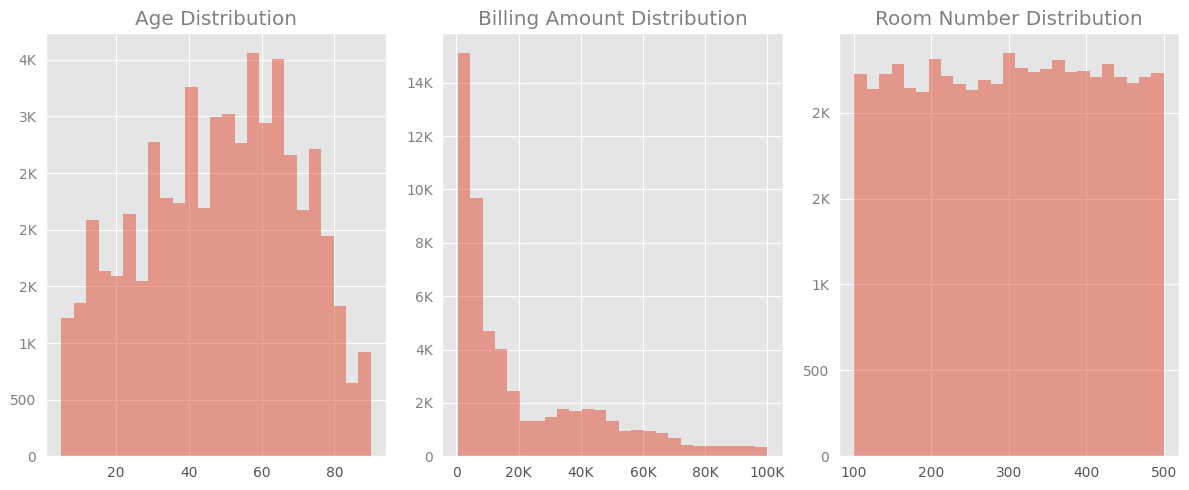

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(12, 5))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=25, kde=False, ax=axes[i], edgecolor=None, alpha=.5)
    axes[i].set_title(f'{numerical_columns_titles[i]} Distribution', fontweight="ultralight", color="grey")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelcolor='grey')
    axes[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
    axes[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
    axes[i].tick_params(axis='x', bottom=False)
    axes[i].tick_params(axis='y', left=False)
    
plt.tight_layout()
plt.show()

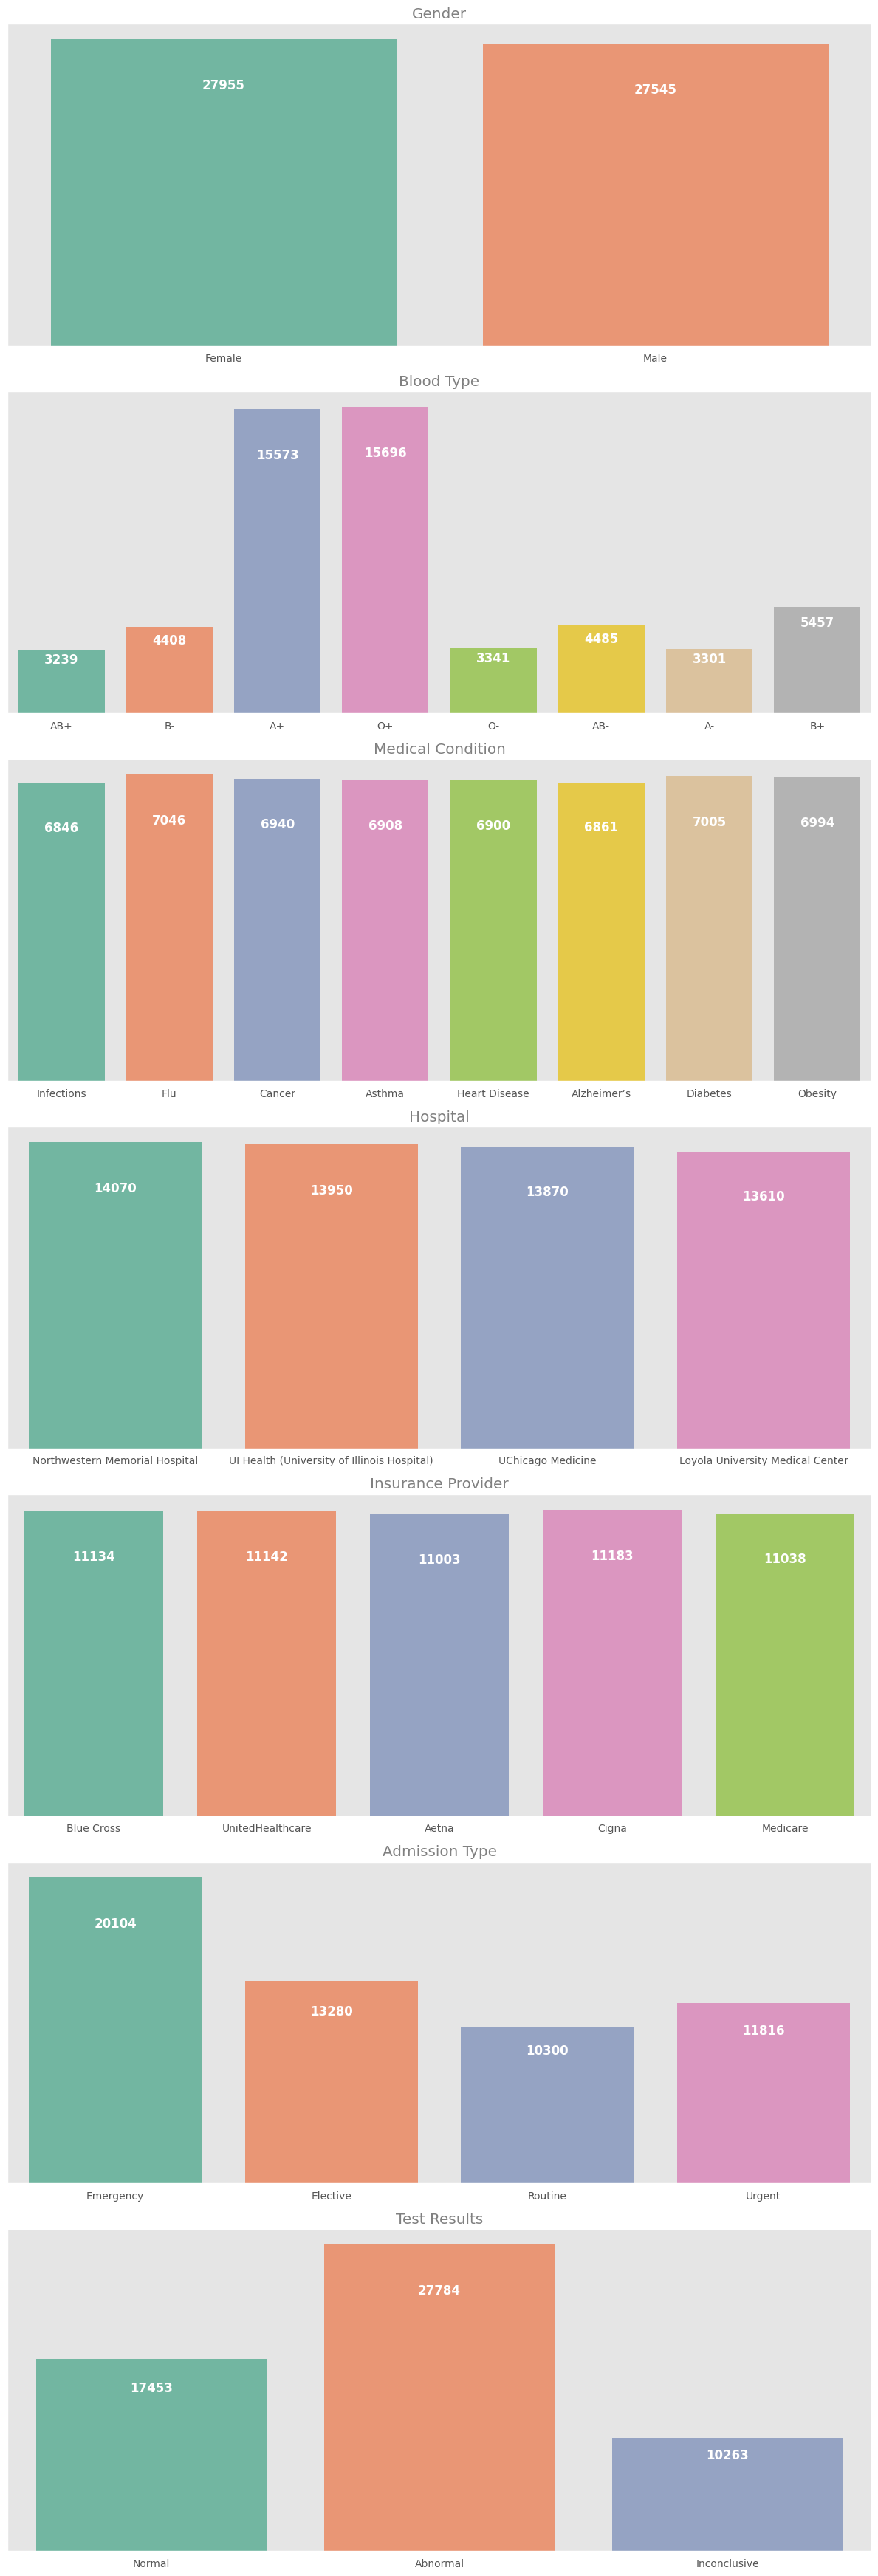

In [30]:
fig, axes = plt.subplots(len(object_columns), 1, figsize=(12, 5 * len(object_columns)))

for i, col in enumerate(object_columns):
    ax = sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette='Set2')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.85),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')

    ax.set_title(object_columns_titles[i], fontweight="ultralight", color="grey")
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.tick_params(axis='x', bottom=False)
    ax.set_xticks(ax.get_xticks())


plt.tight_layout()
plt.show()

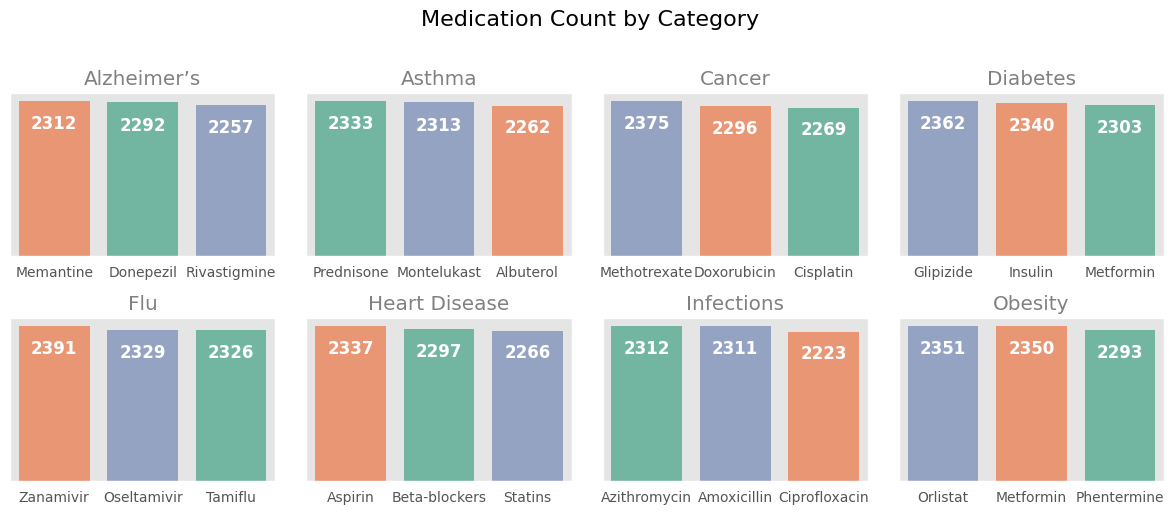

In [31]:
fig, axes = plt.subplots(2, 4, figsize=(12, 5))

for ax, (category, subset) in zip(axes.flatten(), df.groupby('medical_condition')):
    sns.countplot(
        data=subset,
        x='medication',
        hue='medication',
        order=subset['medication'].value_counts().index,
        palette='Set2',
        legend=False,
        ax=ax
    )
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.85),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')
    
    ax.set_title(category, fontweight='ultralight', color='grey')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', bottom=False)
    ax.set_yticks([])


fig.suptitle('Medication Count by Category', color='black', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<a id="financial-insights-trends"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Financial Insights & Billing Trends</h1>
</div>

### Which age range is associated with the highest hospital costs?

In [32]:
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']

df['age_range'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

billing_by_age_range = df.groupby('age_range', observed=False)['billing_amount'].mean().sort_values(ascending=False)

highest_billing_age_range = billing_by_age_range.idxmax()
highest_billing_amount = billing_by_age_range.max()

billing_by_age_range

age_range
76-100    41895.849678
61-75     39969.921398
46-60     25313.848675
31-45      6360.781807
19-30      3711.342014
0-18       3465.086254
Name: billing_amount, dtype: float64

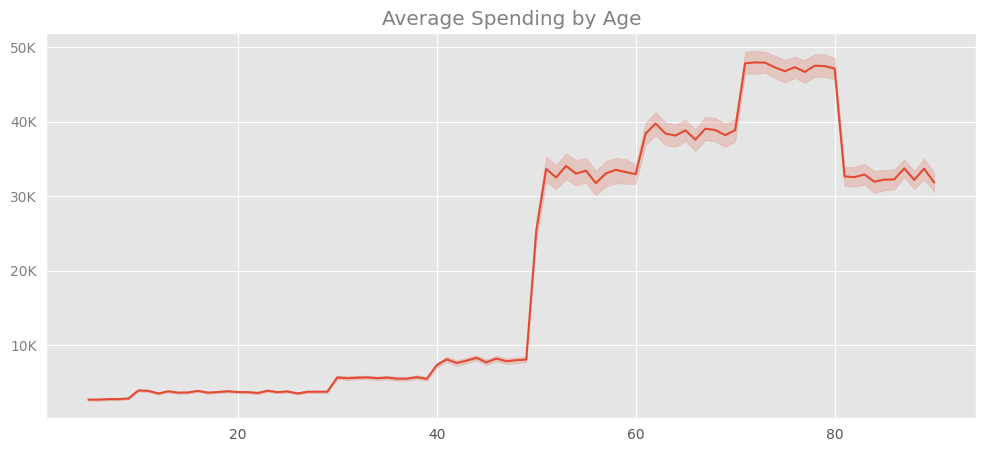

In [33]:
plt.figure(figsize=(12,5))

ax = sns.lineplot(x=df['age'], y=df['billing_amount'])

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.tick_params(axis='y', labelcolor='grey')
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', bottom=False)

plt.title('Average Spending by Age', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.show()

<h3 style="margin-bottom: 10px; font-weight: bold;">Answer</h3>
<div style="
    background-color: black;
    color: white;
    font-size: 16px; 
    padding: 8px; border-radius: 2px; 
    margin-top: 10px;">
    <ul style="list-style-type: none; padding: 0;">
        <li><strong>Cancer</strong> is associated with the highest hospital costs, averaging <strong>\$64,537</strong> per patient. This is likely due to the complexity and intensity of cancer treatments such as surgery, chemotherapy, and radiation.
</li>
    </ul>
</div>



#### Billing Amounts by Medical Condition

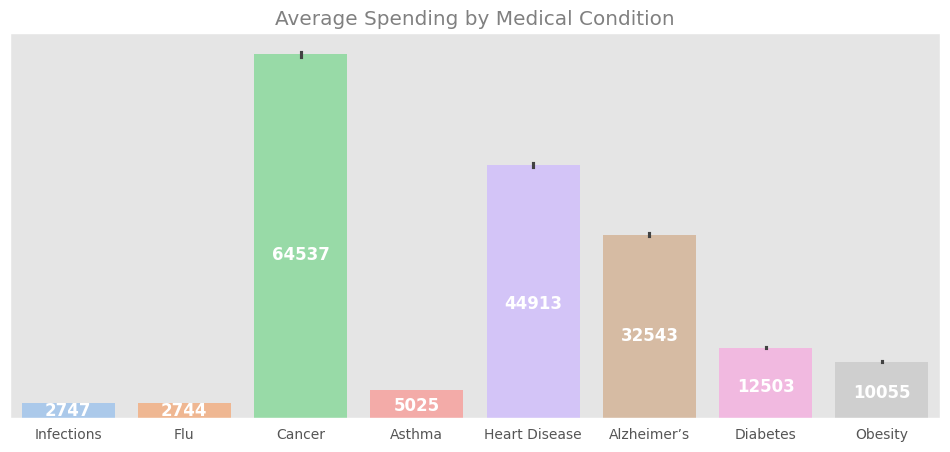

In [34]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x=df['medical_condition'], y=df['billing_amount'], hue=df['medical_condition'], palette="pastel")

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.set_yticks([])
ax.tick_params(axis='x', bottom=False)

for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.45),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')

plt.title('Average Spending by Medical Condition', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Which medical conditions are associated with the highest and most variable hospital costs?

In [35]:
billing_by_medical_condition = df.groupby('medical_condition')['billing_amount'].mean().round(0).astype(int).sort_values(ascending=False)
print('Top 5 Average Billing Amounts by Medidcal Condition')

billing_by_medical_condition.head()

Top 5 Average Billing Amounts by Medidcal Condition


medical_condition
Cancer           64537
Heart Disease    44913
Alzheimer’s      32544
Diabetes         12503
Obesity          10056
Name: billing_amount, dtype: int64

<h3 style="margin-bottom: 10px; font-weight: bold;">Answer</h3>
<div style="
    background-color: black;
    color: white;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Cancer</strong> is associated with the highest hospital costs, averaging approximately <strong>\$64,537</strong> per patient. This is likely due to the complexity and intensity of cancer treatments such as surgery, chemotherapy, and radiation.
    </li>
    <li style="margin-top: 8px;">
      <strong>Heart Disease</strong> ranks second, with an average billing of around <strong>\$44,913</strong>, reflecting the cost of emergency care, cardiac procedures, long hospital stays, and follow-up treatments.
    </li>
    <li style="margin-top: 8px;">
      <strong>Alzheimer’s</strong> follows at an average cost of <strong>\$32,544</strong>, indicating significant resource use likely due to long-term care, monitoring, and support services.
    </li>
    <li style="margin-top: 8px;">
      <strong>Diabetes</strong> patients incur an average hospital cost of approximately <strong>\$12,503</strong>, tied to chronic disease management and treatment of complications.
    </li>
    <li style="margin-top: 8px;">
      <strong>Obesity</strong> averages around <strong>\$10,056</strong> per patient, often associated with planned procedures like bariatric surgery and management of obesity-related complications.
    </li>
  </ul>
</div>

#### Billing Amounts by Gender

In [36]:
#Which gender is associated with the highest hospital costs?

billing_by_gender = df.groupby('gender')['billing_amount'].mean()

highest_billing_gender = billing_by_gender.idxmax()
highest_billing_amount = billing_by_gender.max()

print(f"The gender associated with the highest billing amount is {highest_billing_gender} with an average billing amount of ${highest_billing_amount:,.0f}.")

The gender associated with the highest billing amount is Female with an average billing amount of $21,913.


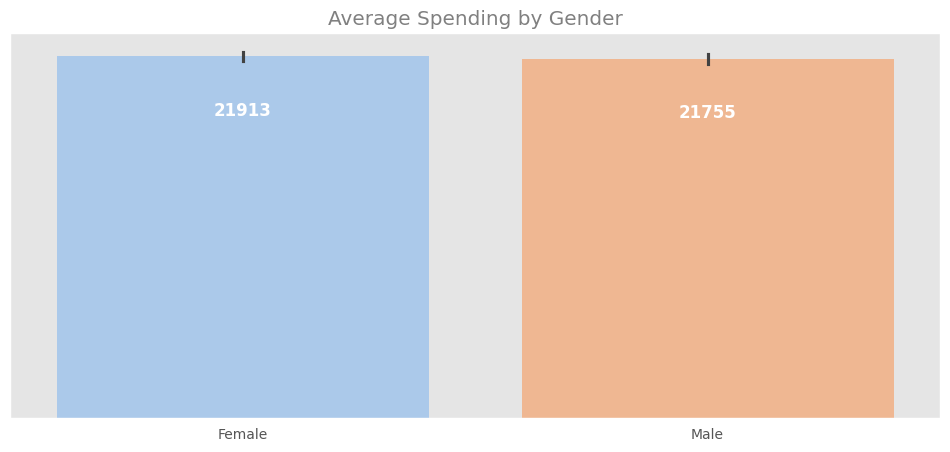

In [37]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x=df['gender'], y=df['billing_amount'], hue=df['gender'], palette="pastel")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.set_yticks([])
ax.tick_params(axis='x', bottom=False)

for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.85),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')

plt.title('Average Spending by Gender', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.show()

<a id="patient-demographics-admissions"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Patient Demographics & Admissions</h1>
</div>

#### Age Distribution by Medical Condition

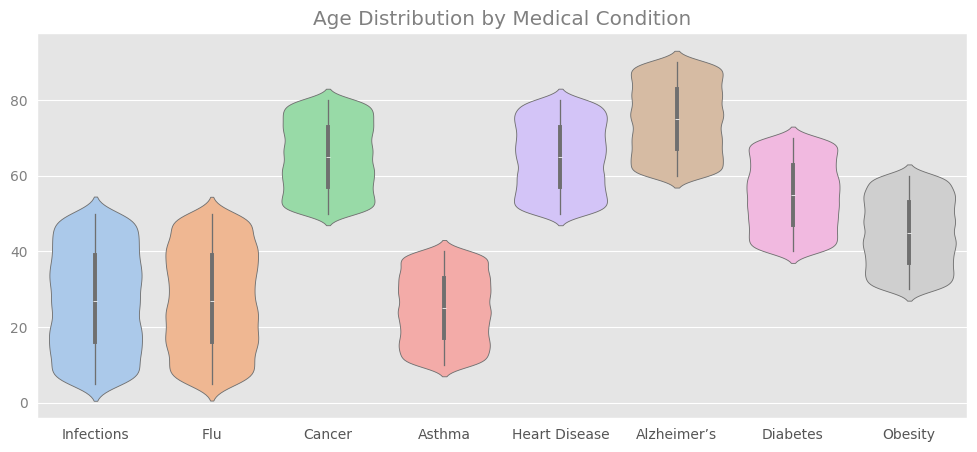

In [38]:
plt.figure(figsize=(12,5))

ax = sns.violinplot(x='medical_condition', hue='medical_condition', y='age', data=df, palette="pastel")
ax.tick_params(axis='y', labelcolor='grey', left=False)
ax.tick_params(axis='x', bottom=False)

plt.title('Age Distribution by Medical Condition', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.show()

### How does the average age of patients vary across different medical conditions?

In [39]:
age_by_condition = df.groupby('medical_condition')['age'].mean().sort_values(ascending=False).astype(int)

age_by_condition

medical_condition
Alzheimer’s      74
Cancer           64
Heart Disease    64
Diabetes         54
Obesity          45
Flu              27
Infections       27
Asthma           24
Name: age, dtype: int64

<h3 style="margin-bottom: 10px; font-weight: bold;">Insights</h3>
<div style="
    background-color: black;
    color: white;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      <strong>Alzheimer’s</strong> patients have the highest average age at <strong>74 years</strong>, which is expected given that Alzheimer’s is a degenerative condition primarily affecting older adults.
    </li>
    <li style="margin-top: 8px;">
      <strong>Cancer</strong> and <strong>Heart Disease</strong> both show an average patient age of <strong>64 years</strong>, reflecting their prevalence among older adults, typically in late middle age or seniors.
    </li>
    <li style="margin-top: 8px;">
      <strong>Diabetes</strong> patients average around <strong>54 years</strong>, aligning with the chronic nature of the disease, which often develops in middle adulthood.
    </li>
    <li style="margin-top: 8px;">
      <strong>Obesity</strong> is most common among patients aged around <strong>45 years</strong>, indicating earlier onset and increasing prevalence in younger adults.
    </li>
    <li style="margin-top: 8px;">
      <strong>Flu</strong> and <strong>Infections</strong> both have an average patient age of approximately <strong>27 years</strong>, suggesting these conditions affect a younger, possibly more active or exposed population.
    </li>
    <li style="margin-top: 8px;">
      <strong>Asthma</strong> has the youngest average age at <strong>24 years</strong>, which is consistent with asthma often being diagnosed in childhood or early adulthood.
    </li>
  </ul>
</div>

#### Gender Distribution per Medical Condition

### Are there significant gender disparities in the prevalence of different medical conditions?

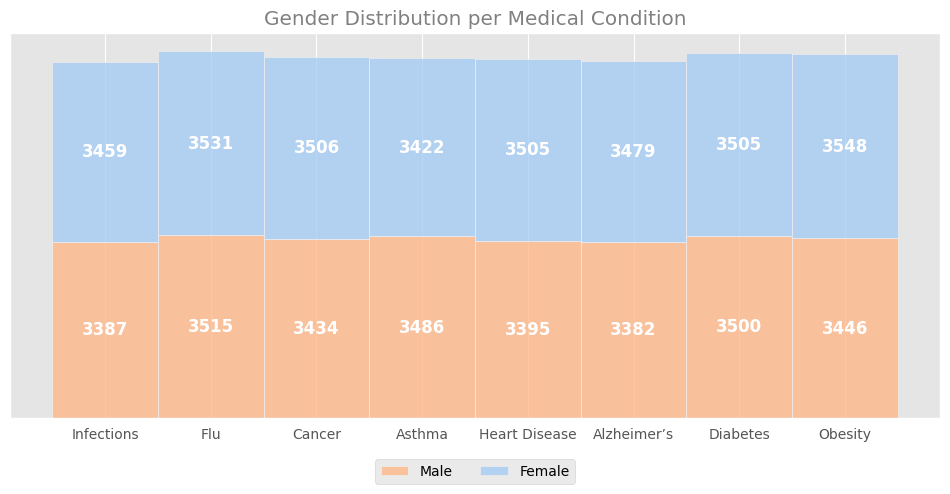

In [40]:
plt.figure(figsize=(12,5))

ax = sns.histplot(x='medical_condition', data=df, hue="gender", palette='pastel', multiple="stack")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.set_yticks([])
ax.tick_params(axis='x', bottom=False)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        (bar.get_x() + bar.get_width() / 2., bar.get_y() + height / 2.),  
                        ha='center', va='center', fontsize=12, fontweight='semibold', color='white')

plt.title('Gender Distribution per Medical Condition', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.legend(['Male', 'Female'], loc='lower center', bbox_to_anchor=(0.5, -0.19), ncol=2)
plt.show()

<h3 style="margin-bottom: 10px; font-weight: bold;">Answer</h3>
<div style="
    background-color: black;
    color: white;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="padding:0; margin: 0; list-style-type: none;">
    <li style="margin-top: 8px;">
      There aren't any significant disparities, the distribution appears to be even.
    </li>
  </ul>
</div>

#### Admissions by Hospital

### Which hospitals handle the most patient admissions, and which are the least utilized?


In [41]:
hospital_admissions = df['hospital'].value_counts()

most_utilized_hospital = hospital_admissions.idxmax()
most_utilized_count = hospital_admissions.max()

least_utilized_hospital = hospital_admissions.idxmin()
least_utilized_count = hospital_admissions.min()

print(f"The most utilized hospital is {most_utilized_hospital} with {most_utilized_count} admissions.")
print(f"The least utilized hospital is {least_utilized_hospital} with {least_utilized_count} admissions.")


The most utilized hospital is Northwestern Memorial Hospital with 14070 admissions.
The least utilized hospital is Loyola University Medical Center with 13610 admissions.


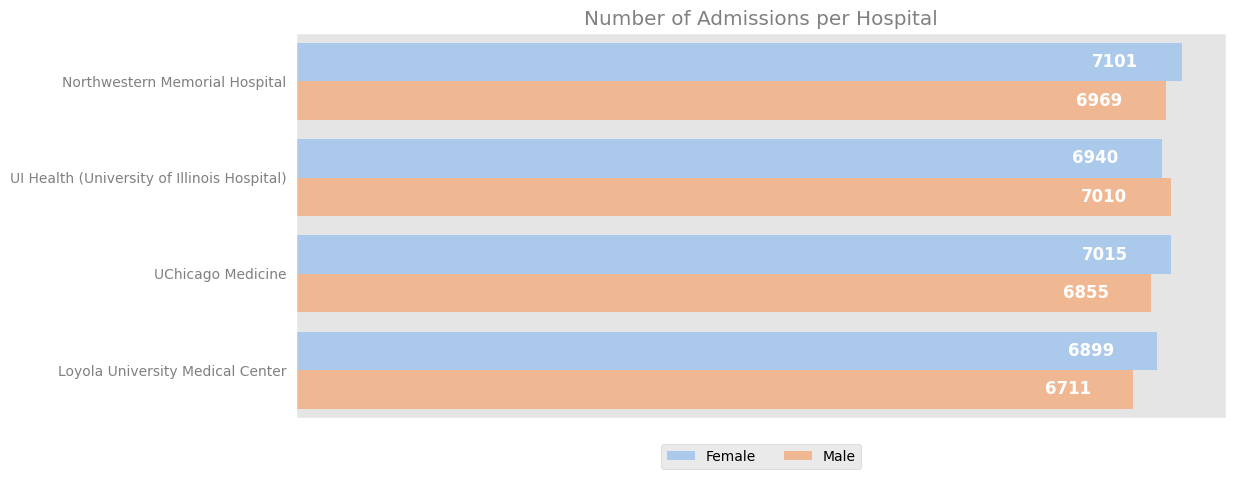

In [42]:
plt.figure(figsize=(12,5))

ax = sns.countplot(y='hospital', data=df, hue='gender', order=df['hospital'].value_counts().index, palette="pastel")
ax.set_xticks([])
ax.tick_params(axis='y', labelcolor='grey', left=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() - (p.get_width() * 0.05), p.get_y() + p.get_height() / 2.), 
                ha='right', va='center', fontsize=12, fontweight='semibold', color='white')
    
plt.title('Number of Admissions per Hospital', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

<a id="hospital-operations-patient-flow"></a>
<div style="
    background-color: #222;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.3);
    color: white;
    border-radius: 8px;
    font-weight: bold;
    font-family: Arial, sans-serif;
    text-align: center;
    padding: 15px;
    width: 96%;
">
<h1>Hospital Operations & Patient Flow</h1>
</div>

#### Admission Type by Condition

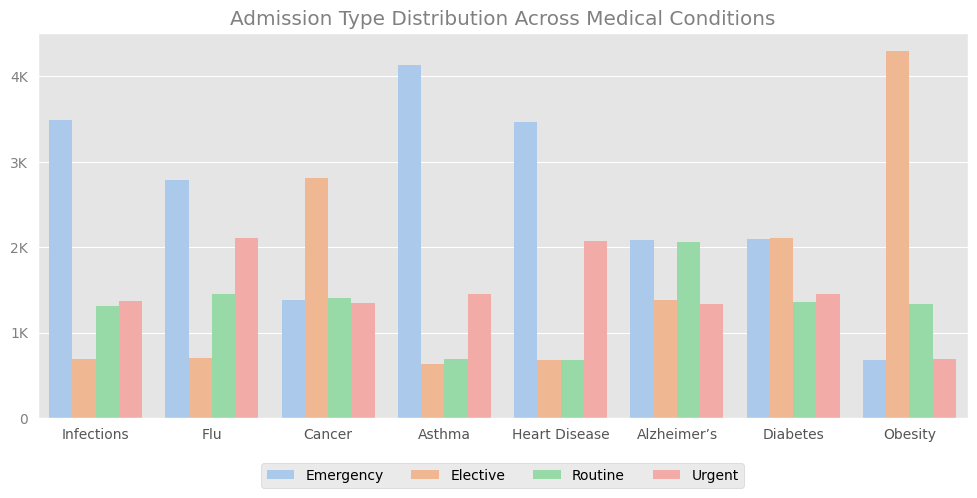

In [43]:
plt.figure(figsize=(12,5))

ax = sns.countplot(x='medical_condition', hue='admission_type', data=df, palette="pastel")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x/1e3:.0f}K" if x >= 1000 else f"{int(x)}"))
ax.tick_params(axis='y', labelcolor='grey')
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', bottom=False)

plt.title('Admission Type Distribution Across Medical Conditions', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()

In [44]:
condition_admission_counts = df.groupby(['medical_condition', 'admission_type']).size().unstack()

def highlight_max(s):
    max_value = s.max()
    return s.apply(lambda x: f"-> {x} <-" if x == max_value else str(x))

formatted_condition_admission_counts = condition_admission_counts.apply(highlight_max, axis=1)

print("Medical Condition vs. Admission Type Distribution (with -> <- for highest count):\n")
print(formatted_condition_admission_counts)

Medical Condition vs. Admission Type Distribution (with -> <- for highest count):

admission_type       Elective   Emergency Routine Urgent
medical_condition                                       
Alzheimer’s              1378  -> 2083 <-    2064   1336
Asthma                    633  -> 4132 <-     693   1450
Cancer             -> 2810 <-        1379    1401   1350
Diabetes           -> 2101 <-        2094    1359   1451
Flu                       701  -> 2785 <-    1456   2104
Heart Disease             678  -> 3465 <-     684   2073
Infections                686  -> 3488 <-    1306   1366
Obesity            -> 4293 <-         678    1337    686


<h3 style="margin-bottom: 10px; font-weight: bold;">Medical Condition vs. Admission Type Insights</h3>
<div style="
    background-color: black;
    color: white;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="list-style-type: none; padding: 0; margin: 0;">
    <li style="margin-top: 8px;">
      <strong>Alzheimer’s:</strong> Most admissions are <strong>Emergency (2,083)</strong>, followed by <strong>Routine (2,064)</strong>. This suggests Alzheimer’s patients are frequently admitted due to acute episodes or complications requiring immediate attention.
    </li>
    <li style="margin-top: 8px;">
      <strong>Asthma:</strong> A strong majority are <strong>Emergency admissions (4,132)</strong>, indicating that asthma often leads to sudden and severe attacks that require urgent care.
    </li>
    <li style="margin-top: 8px;">
      <strong>Cancer:</strong> Most cancer-related admissions are <strong>Elective (2,810)</strong>, meaning they are pre-scheduled treatments or procedures such as chemotherapy or surgery.
    </li>
    <li style="margin-top: 8px;">
      <strong>Diabetes:</strong> Slightly more admissions are <strong>Elective (2,101)</strong> than <strong>Emergency (2,094)</strong>, suggesting both planned checkups/treatments and emergency complications are common.
    </li>
    <li style="margin-top: 8px;">
      <strong>Flu:</strong> Most admissions are <strong>Emergency (2,785)</strong>, with <strong>Urgent (2,104)</strong> and <strong>Routine (1,456)</strong> also being significant. This reflects the flu’s potential to escalate quickly, especially in vulnerable populations.
    </li>
    <li style="margin-top: 8px;">
      <strong>Heart Disease:</strong> Dominated by <strong>Emergency (3,465)</strong> and <strong>Urgent (2,073)</strong> admissions, which is expected given the critical nature of heart-related events.
    </li>
    <li style="margin-top: 8px;">
      <strong>Infections:</strong> Majority are <strong>Emergency (3,488)</strong> admissions, which is consistent with infections that become severe or systemic requiring urgent medical attention.
    </li>
    <li style="margin-top: 8px;">
      <strong>Obesity:</strong> <strong>Elective admissions (4,293)</strong> lead by a large margin, implying most hospitalizations are for planned treatments, surgeries (like bariatric procedures), or consultations rather than emergencies.
    </li>
  </ul>
</div>


#### Average Length of Stay by Condition

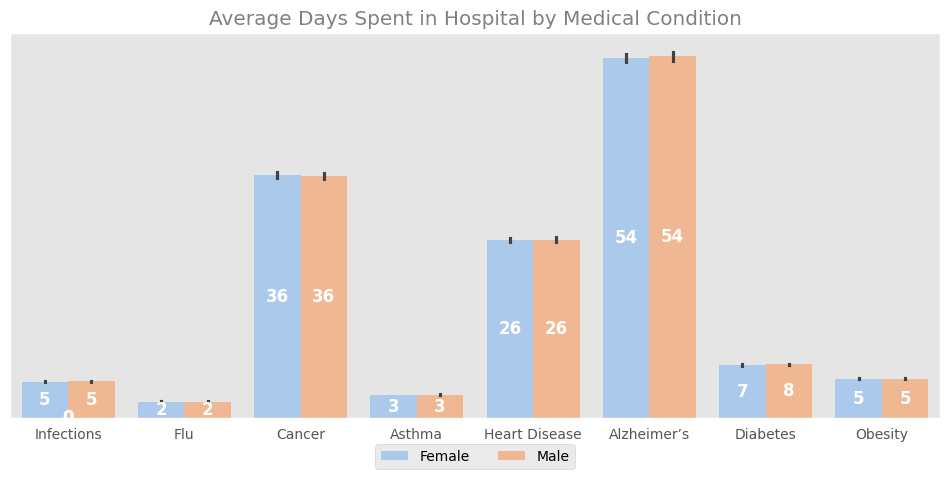

In [45]:
plt.figure(figsize=(12,5))

df['length_of_stay'] = (pd.to_datetime(df['discharge_date']) - pd.to_datetime(df['date_of_admission'])).dt.days

ax = sns.barplot(x='medical_condition', y='length_of_stay', hue='gender', data=df, palette='pastel')
ax.set_yticks([])
ax.tick_params(axis='x', bottom=False)

for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() * 0.50),
                    ha='center', va='center', fontsize=12, fontweight='semibold', color='white')
        
plt.title('Average Days Spent in Hospital by Medical Condition', fontweight='ultralight', color='grey')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

### Which medical conditions require longer hospital stays, and what are the typical hospitalization durations for each condition?

In [46]:
length_of_stay_by_medical_condition = np.floor(df.groupby('medical_condition')['length_of_stay'].mean().sort_values(ascending=False)).astype(int)

def days(x):
    return f"{x} Days"

formatted_length_of_stay_by_medical_condition = length_of_stay_by_medical_condition.apply(days)

formatted_length_of_stay_by_medical_condition

medical_condition
Alzheimer’s      54 Days
Cancer           36 Days
Heart Disease    26 Days
Diabetes          8 Days
Obesity           5 Days
Infections        5 Days
Asthma            3 Days
Flu               2 Days
Name: length_of_stay, dtype: object

<h3 style="margin-bottom: 10px; font-weight: bold;">Answer</h3>
<div style="
    background-color: black;
    color: white;
    padding: 12px 16px;
    margin-top: 10px;
    margin-bottom: 20px;
    font-size: 15px;
    line-height: 1.5;
">
  <ul style="list-style-type: none; padding: 0; margin: 0;">
    <li style="margin-top: 8px;">
      <strong>Alzheimer’s</strong> patients have the longest average hospital stays, with a typical duration of <strong>54 days</strong>. This reflects the complex, long-term nature of managing cognitive decline and associated complications.
    </li>
    <li style="margin-top: 8px;">
      <strong>Cancer</strong> patients follow with an average stay of <strong>36 days</strong>, likely due to scheduled treatments such as chemotherapy, radiation, or surgical recovery.
    </li>
    <li style="margin-top: 8px;">
      <strong>Heart Disease</strong> results in an average hospitalization of <strong>26 days</strong>, consistent with the intensive care and monitoring required after events like heart attacks or surgeries.
    </li>
    <li style="margin-top: 8px;">
      <strong>Diabetes</strong> requires a shorter stay of about <strong>8 days</strong>, often for stabilization during acute episodes or complications like infections.
    </li>
    <li style="margin-top: 8px;">
      <strong>Obesity</strong> and <strong>Infections</strong> both average around <strong>5 days</strong>, suggesting relatively shorter inpatient care, potentially for evaluations, minor procedures, or infection management.
    </li>
    <li style="margin-top: 8px;">
      <strong>Asthma</strong> has an average stay of <strong>3 days</strong>, indicating quick stabilization and discharge after respiratory distress.
    </li>
    <li style="margin-top: 8px;">
      <strong>Flu</strong> results in the shortest hospital stays, averaging just <strong>2 days</strong>, typical of short-term observation and recovery in otherwise stable patients.
    </li>
  </ul>
</div>

<div style="
    background-color: black;
    color: white;
    border-left: 6px solid #2196F3;
    padding: 20px 28px;
    margin-top: 30px;
    margin-bottom: 40px;
    font-size: 16px;
    line-height: 1.7;
    border-radius: 10px;
    box-shadow: 0 0 10px rgba(33, 150, 243, 0.3);
">
  <h2 style="margin-top: 0; font-size: 22px; font-weight: bold; color: #4FC3F7;">🎓 Thank You for Visiting!</h2>
  <p style="margin-bottom: 12px;">
    I'm incredibly grateful that you took the time to explore my Healthcare Visual EDA project.
    
Healthcare is a topic that I care about deeply, and I hope it sparked some meaningful insights or ideas for you.
  </p>
  <p style="margin-bottom: 12px;">
    If you found it helpful, please consider leaving a like or sharing your thoughts — feedback is always welcome!
  </p>
  <p style="margin-bottom: 12px;">
    I'd also love to connect and grow alongside others who are passionate about data and healthcare.
    You can find me on LinkedIn and join my journey:
    <br>
    <a href="https://www.linkedin.com/in/eduardo-licea-9575a3333" target="_blank" style="color: #64B5F6; text-decoration: none; font-weight: bold;">
      ➤ Connect with me on my new LinkedIn!
    </a>
  </p>
  <p style="margin-bottom: 0;">
    See ya around guys! 🚀
  </p>
</div>